In [1]:
#importing necessary libraries
from flask import Flask,render_template,url_for,request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#Read the dataset
df = pd.read_csv("YoutubeSpamMergedData.csv")

In [3]:
#first five rows
df.head()

,Unnamed: 0,Unnamed: 1,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,Psy,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,Psy,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Psy,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,Psy,3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,Psy,4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
#Last five rows
df.tail()

,Unnamed: 0,Unnamed: 1,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1951,Shakira,365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,Shakira,366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,Shakira,367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,Shakira,368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
1955,Shakira,369,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0


In [5]:
#dataset Shape
df.shape

(1956, 7)

In [6]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1956 non-null   object
 1   Unnamed: 1  1956 non-null   int64 
 2   COMMENT_ID  1956 non-null   object
 3   AUTHOR      1956 non-null   object
 4   DATE        1711 non-null   object
 5   CONTENT     1956 non-null   object
 6   CLASS       1956 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 107.1+ KB


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1951    False
1952    False
1953    False
1954    False
1955    False
Length: 1956, dtype: bool

In [8]:
#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [9]:
#Let's print the unique values in our dataset
df.nunique()

Unnamed: 0       5
Unnamed: 1     448
COMMENT_ID    1953
AUTHOR        1792
DATE          1709
CONTENT       1760
CLASS            2
dtype: int64

In [10]:
#Let's print the data types in our data
df.dtypes

Unnamed: 0    object
Unnamed: 1     int64
COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [11]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

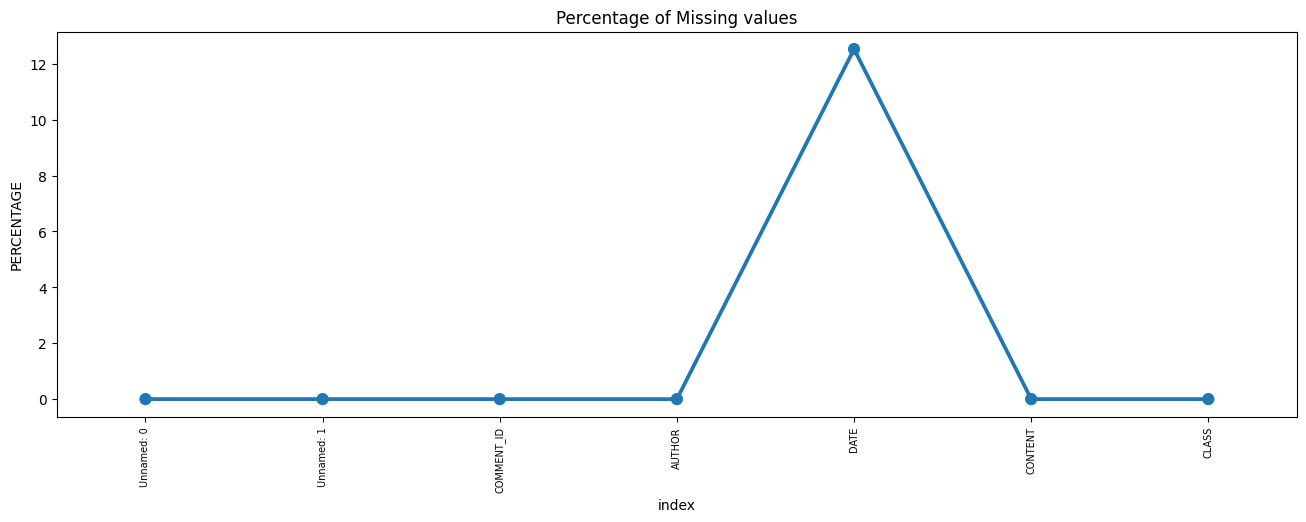

In [12]:
#plot the graph to check wether there are any missing value present

missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

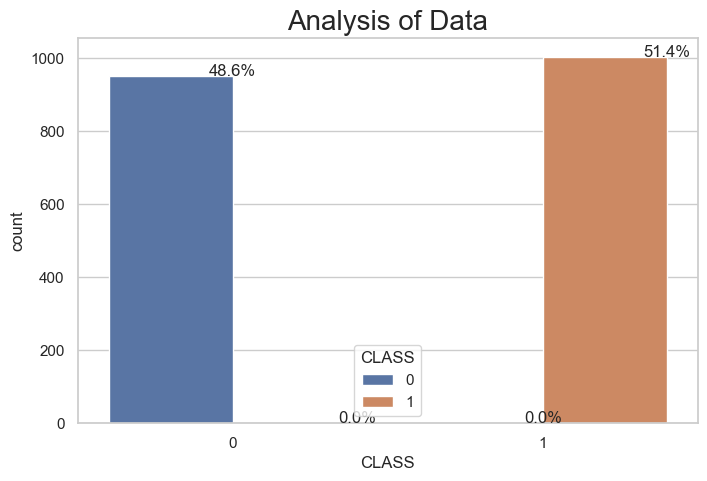

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="CLASS", hue="CLASS", data=df)
plt.title('Analysis of Data', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [14]:
df = df[['CONTENT', 'CLASS']]

In [15]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [16]:
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [17]:
df.CLASS.value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [18]:
def text_clean(CONTENT): 
    # changing to lower case
    lower = CONTENT.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [19]:
df['text_clean'] = text_clean(df['CONTENT'])

In [20]:
df.head()

,CONTENT,CLASS,text_clean
0,"Huh, anyway check out this you[tube] channel: ...",1,"huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch?v=vtarggvgtwq check this out .﻿


In [21]:
df = df[['text_clean','CLASS']]

In [22]:
df.head()

,text_clean,CLASS
0,"huh, anyway check out this you[tube] channel: ...",1
1,hey guys check out my new channel and our firs...,1
2,just for test i have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtarggvgtwq check this out .﻿,1


In [23]:
df.tail()

,text_clean,CLASS
1951,i love this song because we sing it at camp al...,0
1952,i love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,shakira u are so wiredo,0
1955,shakira is the best dancer,0


In [24]:
df['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [25]:
df = df[:1000]

In [26]:
df.shape

(1000, 2)

In [27]:
x = df['text_clean']
y= df['CLASS']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=101)

In [29]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english') 
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

In [30]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_train

493    0
735    0
908    1
214    0
382    1
      ..
602    0
105    1
336    0
950    1
416    1
Name: CLASS, Length: 700, dtype: int64

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

multinomialnb = MultinomialNB()
multinomialnb.fit(x_train, y_train)
y_pred = multinomialnb.predict(x_test)

# Calculate accuracy
acc_nb = multinomialnb.score(x_test, y_test) * 100

# Calculate precision, recall, and F1-score
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Accuracy:", acc_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-Score:", f1_nb)
print("Classification Report:")
print(class_report)

Accuracy: 91.33333333333333
Precision: 0.9186609686609688
Recall: 0.9133333333333333
F1-Score: 0.9133949739212898
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       160
           1       0.87      0.96      0.91       140

    accuracy                           0.91       300
   macro avg       0.92      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



In [33]:
import pickle
filename = 'Naive_Bayes.sav'
pickle.dump(multinomialnb, open(filename, 'wb'))

In [34]:
model = pickle.load(open(filename, 'rb'))

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print evaluation metrics for Decision Tree classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

# Classification Report for Decision Tree classifier
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree Classifier:")
print(class_report_dt)

Decision Tree Classifier:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       160
           1       0.94      0.94      0.94       140

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create an AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)
y_pred_adaboost = ada_boost.predict(x_test)

# Calculate metrics
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print("Accuracy (AdaBoost):", accuracy_adaboost)
print("Precision (AdaBoost):", precision_adaboost)
print("Recall (AdaBoost):", recall_adaboost)
print("F1-Score (AdaBoost):", f1_adaboost)

# Classification Report for AdaBoost
class_report_adaboost = classification_report(y_test, y_pred_adaboost)
print("Classification Report (AdaBoost):")
print(class_report_adaboost)

Accuracy (AdaBoost): 0.9566666666666667
Precision (AdaBoost): 0.9570819304152637
Recall (AdaBoost): 0.9566666666666667
F1-Score (AdaBoost): 0.9566060606060607
Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       160
           1       0.97      0.94      0.95       140

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create an MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(x_train, y_train)
y_pred_mlp = mlp_classifier.predict(x_test)

# Calculate metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print("Accuracy (MLP Classifier):", accuracy_mlp)
print("Precision (MLP Classifier):", precision_mlp)
print("Recall (MLP Classifier):", recall_mlp)
print("F1-Score (MLP Classifier):", f1_mlp)

# Classification Report for MLP Classifier
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report (MLP Classifier):")
print(class_report_mlp)

Accuracy (MLP Classifier): 0.9233333333333333
Precision (MLP Classifier): 0.9236363636363637
Recall (MLP Classifier): 0.9233333333333333
F1-Score (MLP Classifier): 0.9232261072261072
Classification Report (MLP Classifier):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       160
           1       0.93      0.90      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [38]:
result = multinomialnb.predict(hvectorizer.transform(['''plz check out fablife / welcome to fablife for diys and challenges so plz  subscribe thx!ï»¿''']))
print(result)
if result==0:
    print("This is a Not_Spam Comment")
else:
    print("This is a Spam Comment")

[1]
This is a Spam Comment


In [39]:
result = multinomialnb.predict(hvectorizer.transform(['''the most viewed youtube video of all time?ï»¿''']))
print(result)
if result==0:
    print("This is a Not_Spam Comment")
else:
    print("This is a Spam Comment")

[0]
This is a Not_Spam Comment


In [40]:
result = multinomialnb.predict(hvectorizer.transform(['''Mix - PSY - GANGNAM STYLE (ê°•ë‚¨ìŠ¤íƒ€ì¼) M/V: PSY - GANGNAM STYLE (ê°•ë‚¨ìŠ¤íƒ€ì¼) M/Vï»¿''']))
print(result)
if result==0:
    print("This is a Not_Spam Comment")
else:
    print("This is a Spam Comment")

[0]
This is a Not_Spam Comment


### **Accuracy Graph**

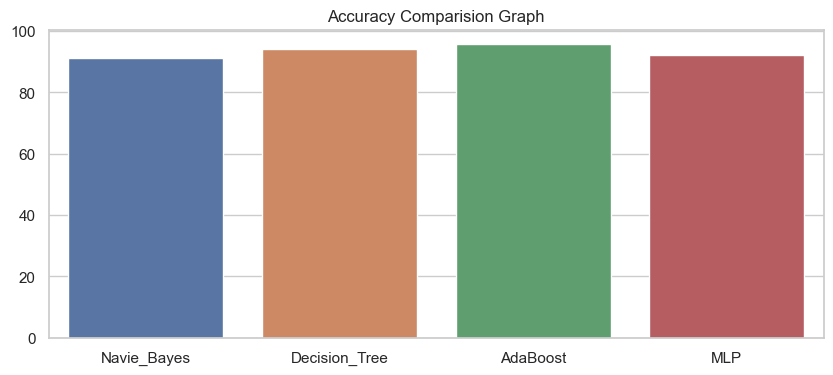

In [42]:
Algorithm = ["Navie_Bayes", "Decision_Tree", "AdaBoost", "MLP"]
Accuracy = [acc_nb, accuracy_dt*100, accuracy_adaboost*100, accuracy_mlp*100]

plt.figure(figsize=(10,4))
sns.barplot(x = Algorithm, y = Accuracy)
plt.title("Accuracy Comparision Graph")
plt.show()